## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from pandas_profiling import ProfileReport 



Bad key savefig.frameon in file C:\Users\B.K.M.Bhat\Anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 421 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.level in file C:\Users\B.K.M.Bhat\Anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 472 ('verbose.level  : silent      # one of silent, helpful, debug, debug-annoying')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.fileo in file C:\Users\B.K.M.Bhat\Anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 473 ('verbose.fileo  : sys.stdout  # a log filename, sys.stdout or sys.stderr')
You probably need to get an updated matp

In [2]:
mushroom = pd.read_csv('Mushroom.csv')
mushroom.shape

(8124, 23)

In [5]:
mushroom.sample(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
7187,p,k,y,n,f,s,f,c,n,b,...,s,w,w,p,w,o,e,w,v,d
2544,e,x,y,g,t,n,f,c,b,w,...,s,w,p,p,w,o,p,k,y,d
7006,p,k,s,e,f,f,f,c,n,b,...,s,p,w,p,w,o,e,w,v,l
6843,p,k,y,e,f,s,f,c,n,b,...,s,p,w,p,w,o,e,w,v,p
3214,e,f,f,e,t,n,f,c,b,n,...,s,w,g,p,w,o,p,k,v,d
1145,e,x,f,w,f,n,f,w,b,n,...,s,w,w,p,w,o,e,n,s,g
2034,e,x,y,g,t,n,f,c,b,u,...,s,p,g,p,w,o,p,k,v,d
3833,p,x,s,w,f,c,f,c,n,n,...,s,w,w,p,w,o,p,k,s,d
5947,p,b,s,b,t,n,f,c,b,r,...,s,w,w,p,w,t,p,r,v,g
888,e,x,y,y,t,a,f,c,b,w,...,y,w,w,p,w,o,p,k,y,p


All 23 columns seem to have all categorical variables that are coded alphabetically.

In [6]:
mushroom.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [9]:
mushroom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

All the features seem to have non null values with unique identifiers.

## Analysis of features

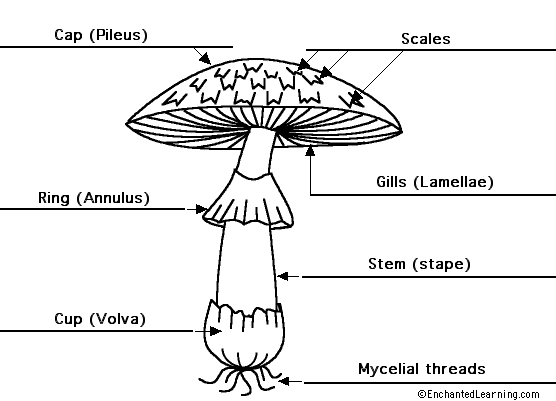

In [19]:
from IPython.display import Image
Image("Mushroom.gif")

### Class

In [10]:
mushroom['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

There are only two types of classes seen. i.e Edible and Poisonous. They are roughly of the same numbers meaning that it's a balanced dataset.

### Cap Shape

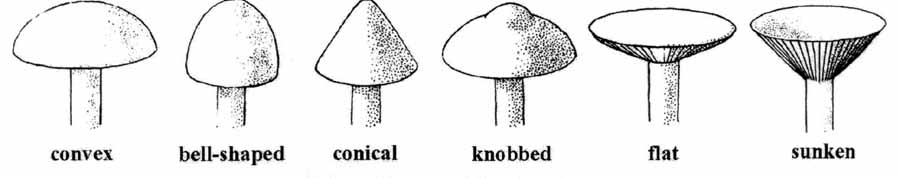

In [23]:
Image("Mushroom_cap_shapes.jpeg")

In [6]:
mushroom['cap-shape'].groupby(mushroom['cap-shape']).count()

cap-shape
b     452
c       4
f    3152
k     828
s      32
x    3656
Name: cap-shape, dtype: int64

There are 6 different cap shapes seen. But no null values.

### Cap Surface

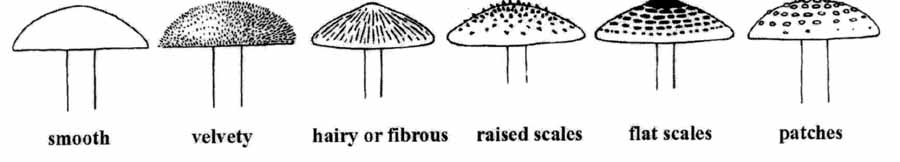

In [24]:
Image("Mushroom_cap_surfaces.jpeg")

In [13]:
mushroom['cap-surface'].value_counts()

y    3244
s    2556
f    2320
g       4
Name: cap-surface, dtype: int64

The cap surfaces are seen to be of 4 different types and no null values seen.

### Cap Color

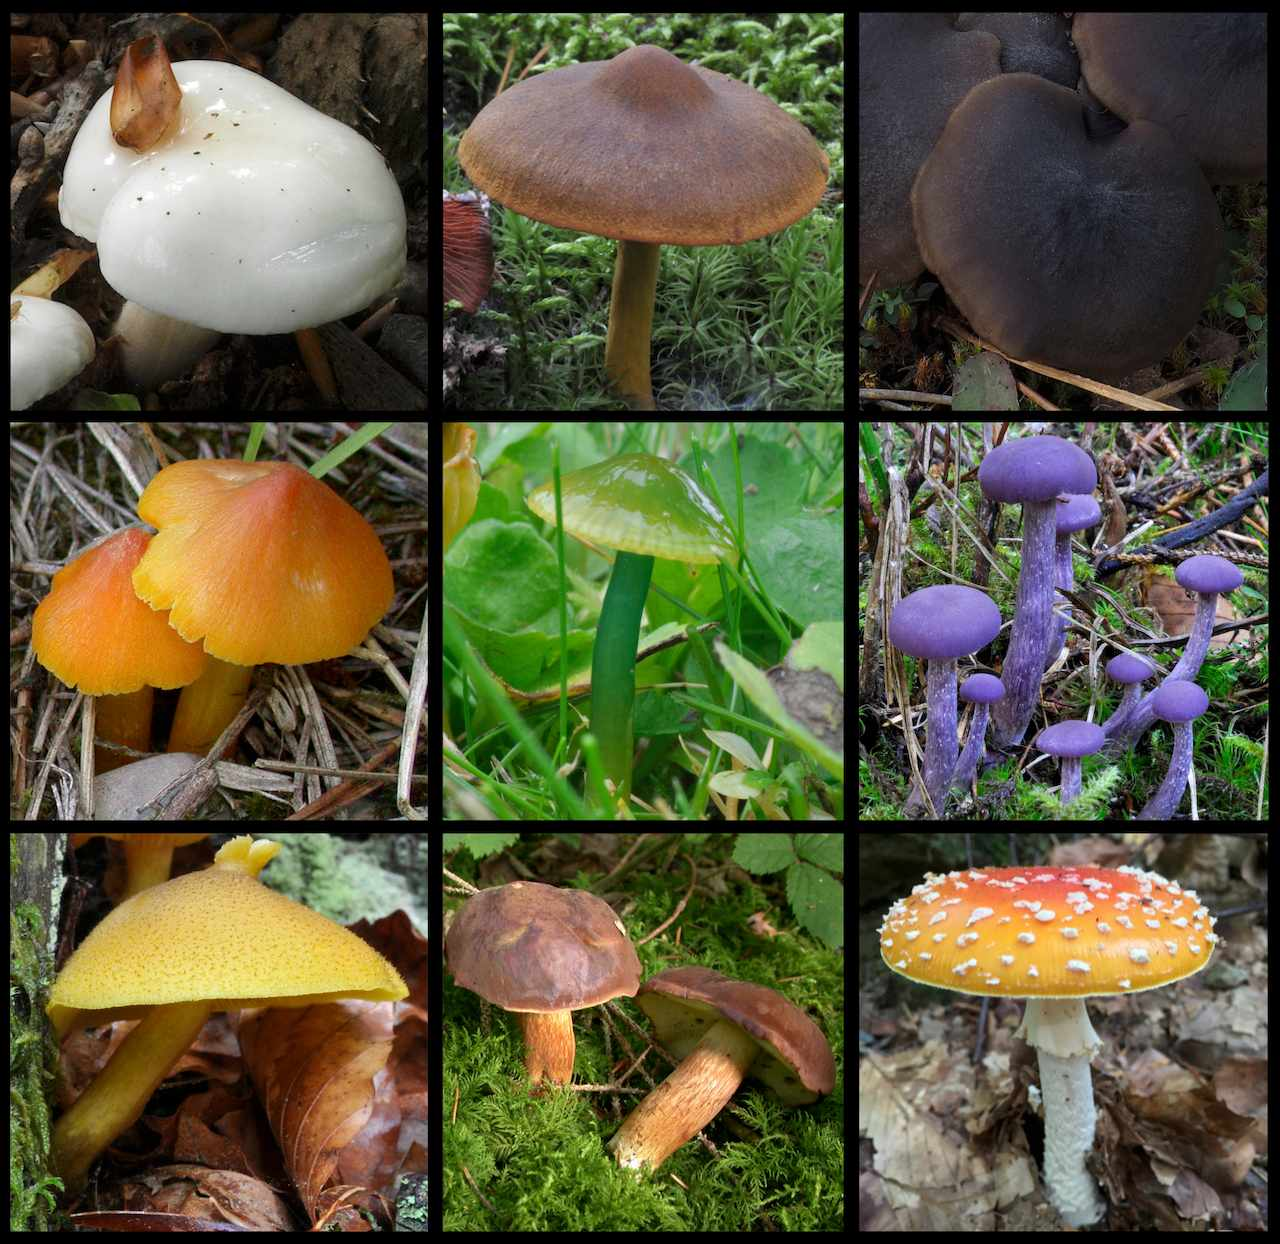

In [25]:
Image("Mushroom_colors.jpeg")

In [8]:
mushroom['cap-color'].groupby(mushroom['cap-color']).count()

cap-color
b     168
c      44
e    1500
g    1840
n    2284
p     144
r      16
u      16
w    1040
y    1072
Name: cap-color, dtype: int64

10 different cap colors are seen. All cap colors are clearly populated without any missing values.

### Surface Bruises

In [14]:
mushroom['bruises'].groupby(mushroom['bruises']).count()

bruises
f    4748
t    3376
Name: bruises, dtype: int64

There are two types of bruises seen.

### Mushroom Odor

In [10]:
mushroom['odor'].groupby(mushroom['odor']).count()

odor
a     400
c     192
f    2160
l     400
m      36
n    3528
p     256
s     576
y     576
Name: odor, dtype: int64

### Gill Attachment

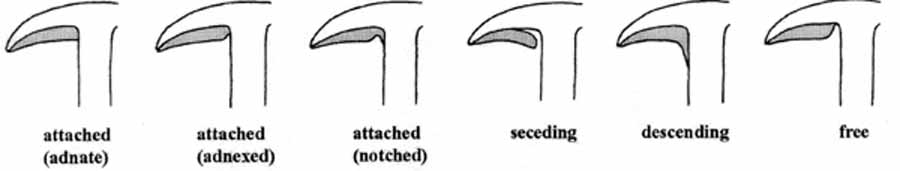

In [27]:
Image("Mushroom_gill_attachment.jpeg")

In [29]:
mushroom['gill-attachment'].groupby(mushroom['gill-attachment']).count()

gill-attachment
a     210
f    7914
Name: gill-attachment, dtype: int64

Though there are different types of gill atttachment seen, in our data the mushrooms are classified as attached and free only.

### Gill Spacing

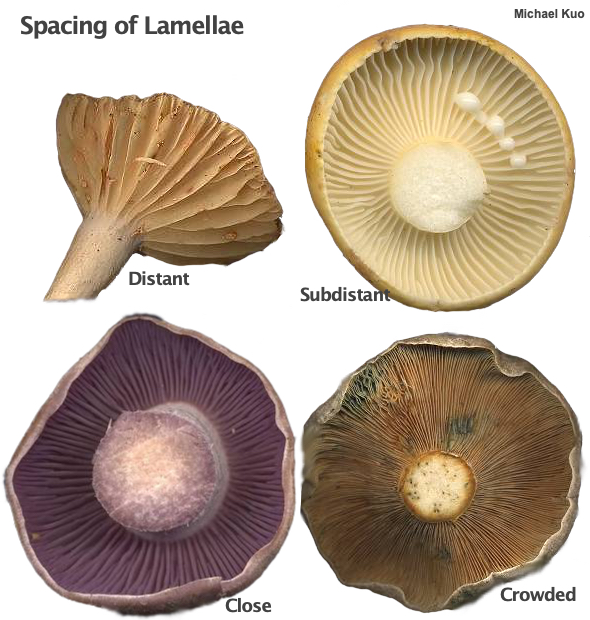

In [31]:
Image("Mushroom_gills.jpg")

In [12]:
mushroom['gill-spacing'].groupby(mushroom['gill-spacing']).count()

gill-spacing
c    6812
w    1312
Name: gill-spacing, dtype: int64

We have close(c) and crowded(w) gills on our mushrooms.

### Gill Size

In [13]:
mushroom['gill-size'].groupby(mushroom['gill-size']).count()

gill-size
b    5612
n    2512
Name: gill-size, dtype: int64

### Gill Color

In [14]:
mushroom['gill-color'].groupby(mushroom['gill-color']).count()

gill-color
b    1728
e      96
g     752
h     732
k     408
n    1048
o      64
p    1492
r      24
u     492
w    1202
y      86
Name: gill-color, dtype: int64

### Stalk Shape

In [15]:
mushroom['stalk-shape'].groupby(mushroom['stalk-shape']).count()

stalk-shape
e    3516
t    4608
Name: stalk-shape, dtype: int64

### Stalk Root

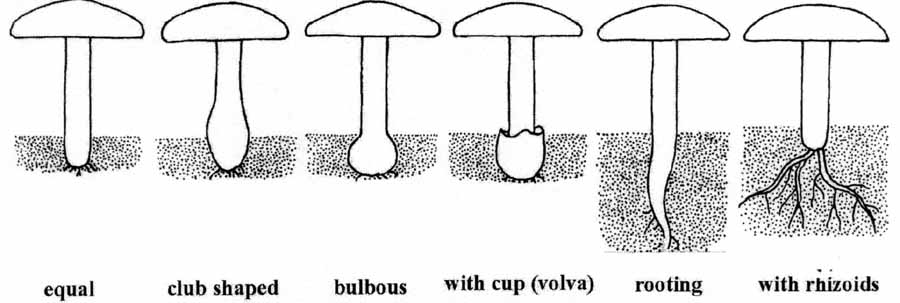

In [32]:
Image("Mushroom_stalk_root.jpg")

In [44]:
mushroom['stalk-root'].groupby(mushroom['stalk-root']).count() 

stalk-root
?    2480
b    3776
c     556
e    1120
r     192
Name: stalk-root, dtype: int64

We have mushrooms with bulbous(b), clubbed(c), equal(e) and rooted(r) stalks.
There are missing values seen. 

They can be considered and plain stalks and let's replace questions marks with missing.

In [45]:
mushroom['stalk-root'].replace('?','NA', inplace =True)

In [48]:
mushroom['stalk-root'].unique()

array(['e', 'c', 'b', 'r', 'NA'], dtype=object)

### Stalk Surface Above Ring 

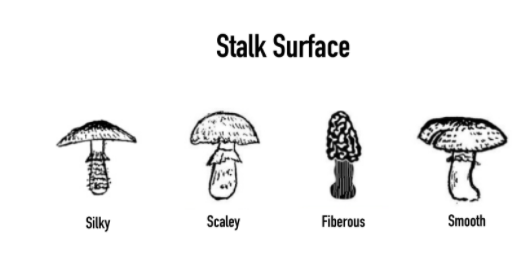

In [34]:
Image("Stalk_surfaces.png")

In [17]:
mushroom['stalk-surface-above-ring'].groupby(mushroom['stalk-surface-above-ring']).count()

stalk-surface-above-ring
f     552
k    2372
s    5176
y      24
Name: stalk-surface-above-ring, dtype: int64

We have four types of stalk surfaces above ring. Fibrous(f), Scaley(y), Silky(k), Smooth(s).

### Stalk Surface Below Ring

In [18]:
mushroom['stalk-surface-below-ring'].groupby(mushroom['stalk-surface-below-ring']).count()

stalk-surface-below-ring
f     600
k    2304
s    4936
y     284
Name: stalk-surface-below-ring, dtype: int64

Stalk surfaces below ring are similar to stalk surfaces above ring.

Hence we have Fibrous(f), Scaley(y), Silky(k), Smooth(s) stalks.

### Stalk Color Above Ring

In [19]:
mushroom['stalk-color-above-ring'].groupby(mushroom['stalk-color-above-ring']).count()

stalk-color-above-ring
b     432
c      36
e      96
g     576
n     448
o     192
p    1872
w    4464
y       8
Name: stalk-color-above-ring, dtype: int64

### Stalk Color Below Ring

In [20]:
mushroom['stalk-color-below-ring'].groupby(mushroom['stalk-color-below-ring']).count()

stalk-color-below-ring
b     432
c      36
e      96
g     576
n     512
o     192
p    1872
w    4384
y      24
Name: stalk-color-below-ring, dtype: int64

### Veil Type

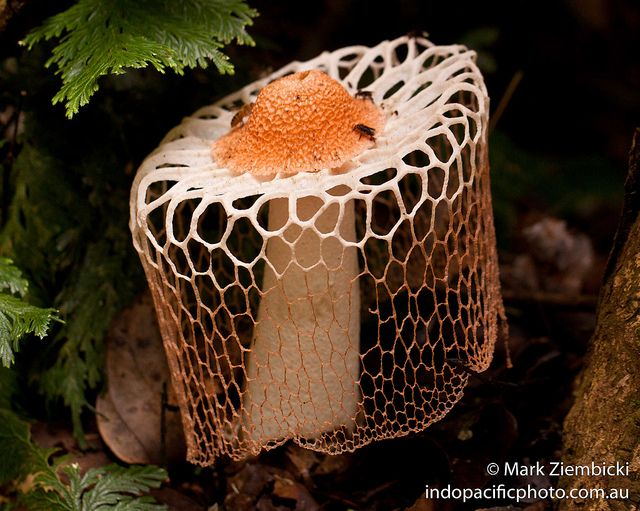

In [36]:
Image("Veiled_mushroom.jpg")

In [21]:
mushroom['veil-type'].groupby(mushroom['veil-type']).count()

veil-type
p    8124
Name: veil-type, dtype: int64

All mushrooms are of partial veil type.

### Veil Color

In [16]:
mushroom['veil-color'].groupby(mushroom['veil-color']).count()

veil-color
n      96
o      96
w    7924
y       8
Name: veil-color, dtype: int64

Veils of four different colors seen. i.e Brown, Orange, White and Yellow.

### Number of Rings

Mushroom rings are also called as mushroom skirts.

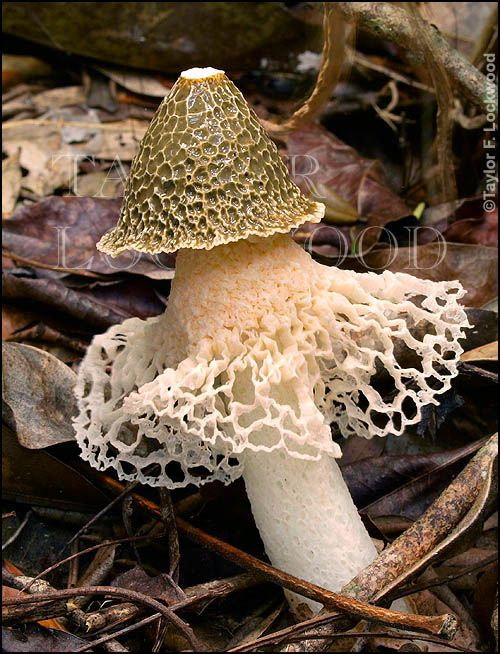

In [37]:
Image("Mushroom_ring.jpg")

In [23]:
mushroom['ring-number'].groupby(mushroom['ring-number']).count()

ring-number
n      36
o    7488
t     600
Name: ring-number, dtype: int64

The mushrooms have no rings, one ring or two rings.

### Ring Types

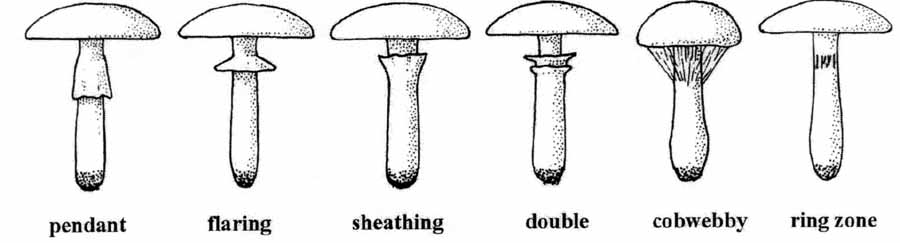

In [38]:
Image("mushroom_ring_types.jpg")

In [24]:
mushroom['ring-type'].groupby(mushroom['ring-type']).count()

ring-type
e    2776
f      48
l    1296
n      36
p    3968
Name: ring-type, dtype: int64

### Spore print colors

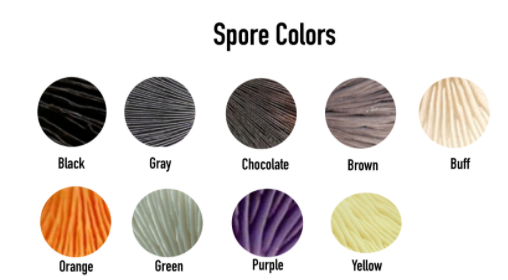

In [40]:
Image("spore_print_colors.png")

In [25]:
mushroom['spore-print-color'].groupby(mushroom['spore-print-color']).count()

spore-print-color
b      48
h    1632
k    1872
n    1968
o      48
r      72
u      48
w    2388
y      48
Name: spore-print-color, dtype: int64

We have the following spore print colors on our data. black(k),brown(n),buff(b),chocolate(h),gray(g),green(r),orange(o),purple(u),white(w) and yellow(y)

### Mushroom population

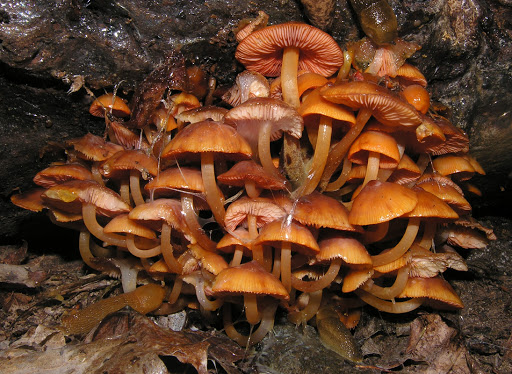

In [41]:
Image("grouped_mushrooms.jpg")

In [26]:
mushroom['population'].groupby(mushroom['population']).count()

population
a     384
c     340
n     400
s    1248
v    4040
y    1712
Name: population, dtype: int64

Mushrooms can be solitary or grouped in nature. On our data we have abundant(a), clustered(c), numerous(n), scattered(s), several(v), solitary(y) populations of mushrooms.

### Mushroom habitat

In [27]:
mushroom['habitat'].groupby(mushroom['habitat']).count()

habitat
d    3148
g    2148
l     832
m     292
p    1144
u     368
w     192
Name: habitat, dtype: int64

We have mushrooms found in different habitats like grasses(g), leaves(l), meadows(m), paths(p), urban(u),waste(w) and woods(d)

In [49]:
mushroom.nunique()

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

We have observed that the features align with the scientific literature. There have been no outliers seen in them.

The missing values for stalk roots have been replaced with NA. This data can be exported for further analysis.

In [50]:
mushroom.to_csv('Mushrooms_cleansed.csv')